In [1]:
import pandas as pd
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
import functools
pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from string import punctuation

from collections import Counter
import re
import numpy as np

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IGOEN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IGOEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('C:/Users/IGOEN/Desktop/phytoon projecct/projecct/data/viral.csv')
print(data.shape)

(2110, 18)


In [3]:
data.head(10)

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1162193969234817030,OPR_Noticias,VIDEO VIRAL | Este ladrón intentó entrar en un...,Fri Aug 16 02:46:49 +0000 2019,16/08/2019 03:46:49,NaN,NaN,NaN,NaN,1088658221819146241,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1095021007...,287.0,28.0,NaN,http://twitter.com/OPR_Noticias/statuses/11621...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
1,1162193966386864129,valeriamateos6,RT @Soylizini: Esto sí háganlo viral para que ...,Fri Aug 16 02:46:48 +0000 2019,16/08/2019 03:46:48,NaN,NaN,NaN,NaN,1107782550695616512,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1146798068...,142.0,212.0,NaN,http://twitter.com/valeriamateos6/statuses/116...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2,1162193961592561664,aya_ddt,"RT @Yokaborneo: Lagi viral di Kalbar, tepatnya...",Fri Aug 16 02:46:47 +0000 2019,16/08/2019 03:46:47,NaN,NaN,NaN,NaN,830022946861113344,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/8300278358...,245.0,145.0,dimana ya... 🤔,http://twitter.com/aya_ddt/statuses/1162193961...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
3,1162193952323330048,Yungty__15,RT @NBCNews: There are several specific hallma...,Fri Aug 16 02:46:45 +0000 2019,16/08/2019 03:46:45,NaN,NaN,NaN,NaN,1656015960,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1159325729...,920.0,3630.0,"Athens, AL",http://twitter.com/Yungty__15/statuses/1162193...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
4,1162193946124181504,readwithlee313,RT @CITGOiaOLLE: We are truly grateful for all...,Fri Aug 16 02:46:43 +0000 2019,16/08/2019 03:46:43,NaN,NaN,NaN,NaN,895079166424489985,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1088633865...,144.0,408.0,NaN,http://twitter.com/readwithlee313/statuses/116...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
5,1162193943313862656,BruceMurdoch7,@MikeJam05901527 @MotherResister Very cool. I...,Fri Aug 16 02:46:43 +0000 2019,16/08/2019 03:46:43,NaN,NaN,1.086070e+18,MikeJam05901527,853396022910828544,1.162194e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/9771441911...,1379.0,306.0,"Cranbrook, British Columbia",http://twitter.com/BruceMurdoch7/statuses/1162...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
6,1162193942940672000,kisjdmls,"RT @KosherSoul: A great way to honor 2019, the...",Fri Aug 16 02:46:43 +0000 2019,16/08/2019 03:46:43,NaN,NaN,NaN,NaN,203693462,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1008758191...,507.0,796.0,NC,http://twitter.com/kisjdmls/statuses/116219394...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
7,1162193940721934336,e_conacento,RT @Soylizini: Esto sí háganlo viral para que ...,Fri Aug 16 02:46:42 +0000 2019,16/08/2019 03:46:42,NaN,NaN,NaN,NaN,1105988292229640192,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1160747887...,86.0,149.0,admiring constellations,http://twitter.com/e_conacento/statuses/116219...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
8,1162193940658999301,Intrepido221BX,RT @Nopanaden: La carga viral más elevada de v...,Fri Aug 16 02:46:42 +0000 2019,16/08/2019 03:46:42,NaN,NaN,NaN,NaN,464209491,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1148332613...,1927.0,4598.0,Venezuela,http://twitter.com/Intrepido221BX/statuses/116...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
9,1162193939656519680,MartaMosquera

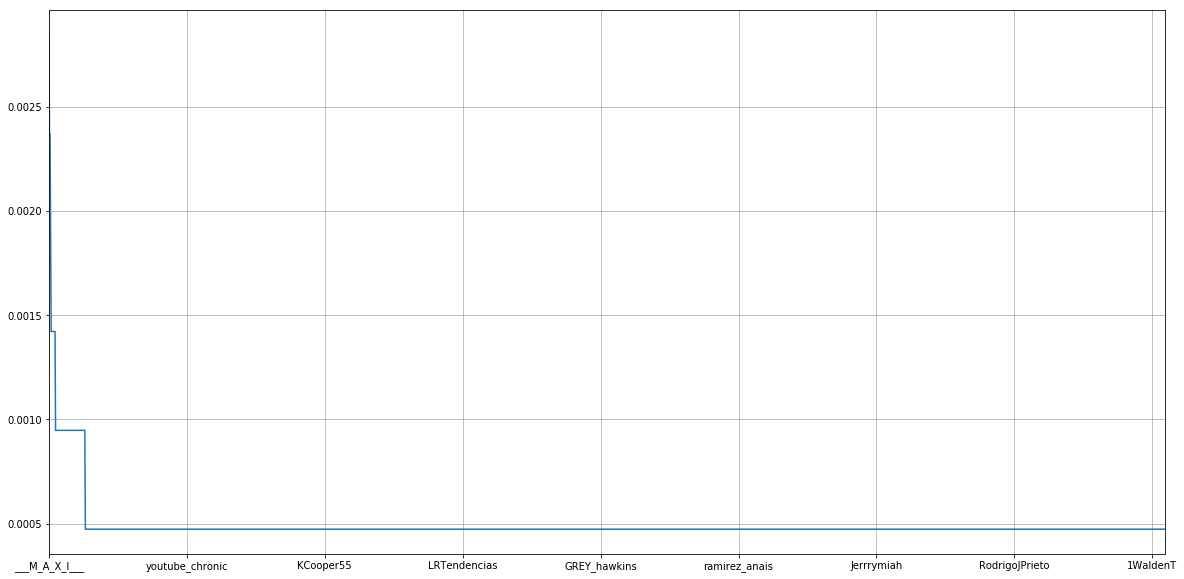

In [5]:
data.from_user.value_counts(normalize=True).plot(kind='line', grid=True, figsize=(20, 10))

In [6]:
data = data.drop_duplicates('text')

In [7]:
data = data[~data['text'].isnull()]
print(data.shape)

(851, 18)


In [8]:
data = data[(data.text.map(len) > 140) & (data.text.map(len) <= 300)]
data.reset_index(inplace=True, drop=True)
print(data.shape)

(344, 18)


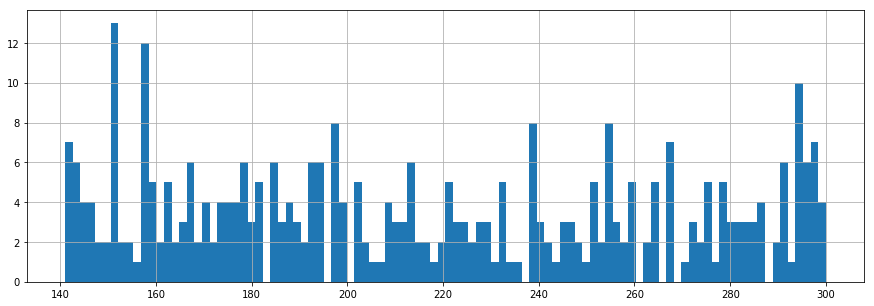

In [9]:
data.text.map(len).hist(figsize=(15, 5), bins=100)

In [10]:
data = data.sample(245, random_state=42)
data.reset_index(inplace=True, drop=True)
data.head(10)

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1162189069214003201,NSknapps,https://t.co/HHt2LGUh60\n\n#bismillah #prophet...,Fri Aug 16 02:27:21 +0000 2019,16/08/2019 03:27:21,NaN,NaN,NaN,NaN,1077088089321996288,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1077092056...,1967.0,4960.0,NaN,http://twitter.com/NSknapps/statuses/116218906...,"{""hashtags"":[{""text"":""bismillah"",""indices"":[25..."
1,1162190156046094336,DDerwenda,RT @Ditarisk: Kader muda Golkar minta Ical des...,Fri Aug 16 02:31:40 +0000 2019,16/08/2019 03:31:40,NaN,NaN,NaN,NaN,1151043271310766080,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1151047499...,10.0,11.0,Indonesia,http://twitter.com/DDerwenda/statuses/11621901...,"{""hashtags"":[{""text"":""golkar"",""indices"":[73,80..."
2,1162187882376941568,jaysrule22,Make this go viral people! Our Canadian border...,Fri Aug 16 02:22:38 +0000 2019,16/08/2019 03:22:38,NaN,NaN,NaN,NaN,700350529,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5478410976...,134.0,680.0,NaN,http://twitter.com/jaysrule22/statuses/1162187...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
3,1162188482850299905,sandriuskyvk,RT @MJ_Montero: Porfa podéis hacer viral esto ...,Fri Aug 16 02:25:01 +0000 2019,16/08/2019 03:25:01,NaN,NaN,NaN,NaN,160618341,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/2366685652...,4569.0,528.0,Filosofeando con la vida,http://twitter.com/sandriuskyvk/statuses/11621...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
4,1162184656436940800,MashuriOyi,RT @detikcom: Kisah soal terciduknya asisten r...,Fri Aug 16 02:09:49 +0000 2019,16/08/2019 03:09:49,NaN,NaN,NaN,NaN,3302951221,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1014863674...,93.0,637.0,indonesia,http://twitter.com/MashuriOyi/statuses/1162184...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
5,1162184266056380417,viral_beastman,@LanyardT @alexa_make @dmschmeyer @questauthor...,Fri Aug 16 02:08:16 +0000 2019,16/08/2019 03:08:16,NaN,NaN,1.157753e+18,LanyardT,1109095195407208448,1.162177e+18,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1109099346...,26.0,47.0,Teppelin,http://twitter.com/viral_beastman/statuses/116...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
6,1162184556306403328,rimonkey,https://t.co/CwFsy9IKNk inviting you to join V...,Fri Aug 16 02:09:25 +0000 2019,16/08/2019 03:09:25,NaN,NaN,NaN,NaN,26325950,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/7605168197...,746.0,1825.0,pa,http://twitter.com/rimonkey/statuses/116218455...,"{""hashtags"":[{""text"":""earnmoney"",""indices"":[19..."
7,1162186617890603008,Claudiaa_maa,Lmao bitches are so weird I swear how you gonn...,Fri Aug 16 02:17:36 +0000 2019,16/08/2019 03:17:36,NaN,NaN,NaN,NaN,926079169,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1158391592...,677.0,442.0,NaN,http://twitter.com/Claudiaa_maa/statuses/11621...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
8,1162191445362712577,GF11160030,"RT @Aleaverv0ter: ""I fact checked the 'What ha...",Fri Aug 16 02:36:47 +0000 2019,16/08/2019 03:36:47,NaN,NaN,NaN,NaN,962602035643330560,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1112029226...,185.0,423.0,United Kingdom,http://twitter.com/GF11160030/statuses/1162191...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
9,1162188095393062914,Analieseie24,Hey everyone! Please share! these are my frien...,Fri A

In [11]:
stop_words = []
f = open('./data/stopword.txt', 'r')
for l in f.readlines():
    stop_words.append(l.replace('\n', ''))
additional_stop_words = ['t', 'will']
stop_words += additional_stop_words
print(len(stop_words))

760


In [12]:
import functools
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [13]:
def tokenizer(text):
    text = clean_text(text)    
    tokens = [word_tokenize(sent) for sent in sent_tokenize(text)]
    tokens = list(functools.reduce(lambda x,y: x+y, tokens))
    tokens = list(filter(lambda token: token not in (stop_words + list(punctuation)) , tokens))
    return tokens

In [14]:
data['text'] = data['text'].map(lambda d: str(d))
data['tokens'] = data['text'].progress_map(lambda d: tokenizer(d))

In [15]:
for descripition, tokens in zip(data['text'].head(5), data['tokens'].head(5)):
    print(':', descripition)
    print('tokens:', tokens)
    print() 

: https://t.co/HHt2LGUh60

#bismillah #prophet #masjidilharam #salah #viral #islamicreminder #medina #quranquotes #astaghfirullah #prayer #mekah #hijrah #inshaallah #knowledge #ameen #doa #umrah #kabah #allahisgreat #muftimenk https://t.co/AA5hcX8STh
tokens: ['bismillah', 'prophet', 'masjidilharam', 'salah', 'viral', 'islamicreminder', 'medina', 'quranquotes', 'astaghfirullah', 'prayer', 'mekah', 'hijrah', 'inshaallah', 'knowledge', 'ameen', 'doa', 'umrah', 'kabah', 'allahisgreat', 'muftimenk']

: RT @Ditarisk: Kader muda Golkar minta Ical desak DPP gelar rapat pleno.

#golkar #partaigolkar #golkarmaju
#golkarbangkit #golkarsolid #golkarbersih #golkaronsosmed
#golkarpedia #bamsoetkangolkar #bamsoet #bambangsiesatyo
#dpr #dprri #Hits #Viral #milenial

https://t.co/pu4iGEXNWc
tokens: ['rt', 'ditarisk', 'kader', 'muda', 'golkar', 'ical', 'desak', 'dpp', 'gelar', 'rapat', 'pleno', 'golkar', 'partaigolkar', 'golkarmaju', 'golkarbangkit', 'golkarsolid', 'golkarbersih', 'golkaronsosmed', 'gol

In [16]:
def keywords(text):
    tokens = data[data['text'] == text]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

In [17]:
data['text'] = data['text'].map(lambda d: str(d))
data['tokens'] = data['text'].progress_map(lambda d: tokenizer(d))

In [18]:
for text in set(data['text']):
    print('text :', text)
    print('top 10 keywords:', keywords(text))
    print('---') 

text : RT @osullivanauthor: My anti-Trump/far right novel is out today!
I would love your help #TheResistance 
Let's make this go viral!
Thanks!
https://t.co/A95ZEHjpWW https://t.co/EXqP6kbTp7
top 10 keywords: [('is', 2), ('rt', 1), ('osullivanauthor', 1), ('my', 1), ('anti', 1), ('trump', 1), ('far', 1), ('right', 1), ('novel', 1), ('out', 1)]
---
text : RT @MarshaCollier: #SpoiledKidsComplaints:
A teen went viral for tweeting from her family's LG smart fridge after her mom confiscated her phone
https://t.co/5AB5q8XFaM https://t.co/7FOcxjv3zq
top 10 keywords: [('her', 3), ('rt', 1), ('marshacollier', 1), ('spoiledkidscomplaints', 1), ('a', 1), ('teen', 1), ('went', 1), ('viral', 1), ('for', 1), ('tweeting', 1)]
---
text : RT @_cryptoAK: Everyone,

Please make this tweet viral!

I will bet @MarkYusko @APompliano  $100,000 EACH that XRP will beat Bitcoin over the next decade!

Invite me onto your podcast and I will publicly make it!

Will you guys take my bet?!?

#xrp $xrp #eth $eth #bt

In [19]:
data['text'] = data['text'].map(lambda d: str(d))
data['tokens'] = data['text'].progress_map(lambda d: tokenizer(d))

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz = vectorizer.fit_transform(list(data['tokens'].map(lambda tokens: ' '.join(tokens))))
vz.shape

(245, 130)

In [21]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

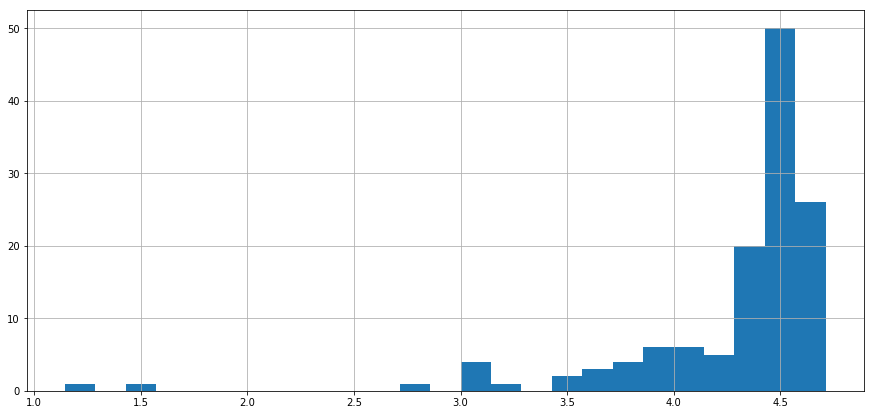

In [22]:
tfidf.tfidf.hist(bins=25, figsize=(15,7))

In [23]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

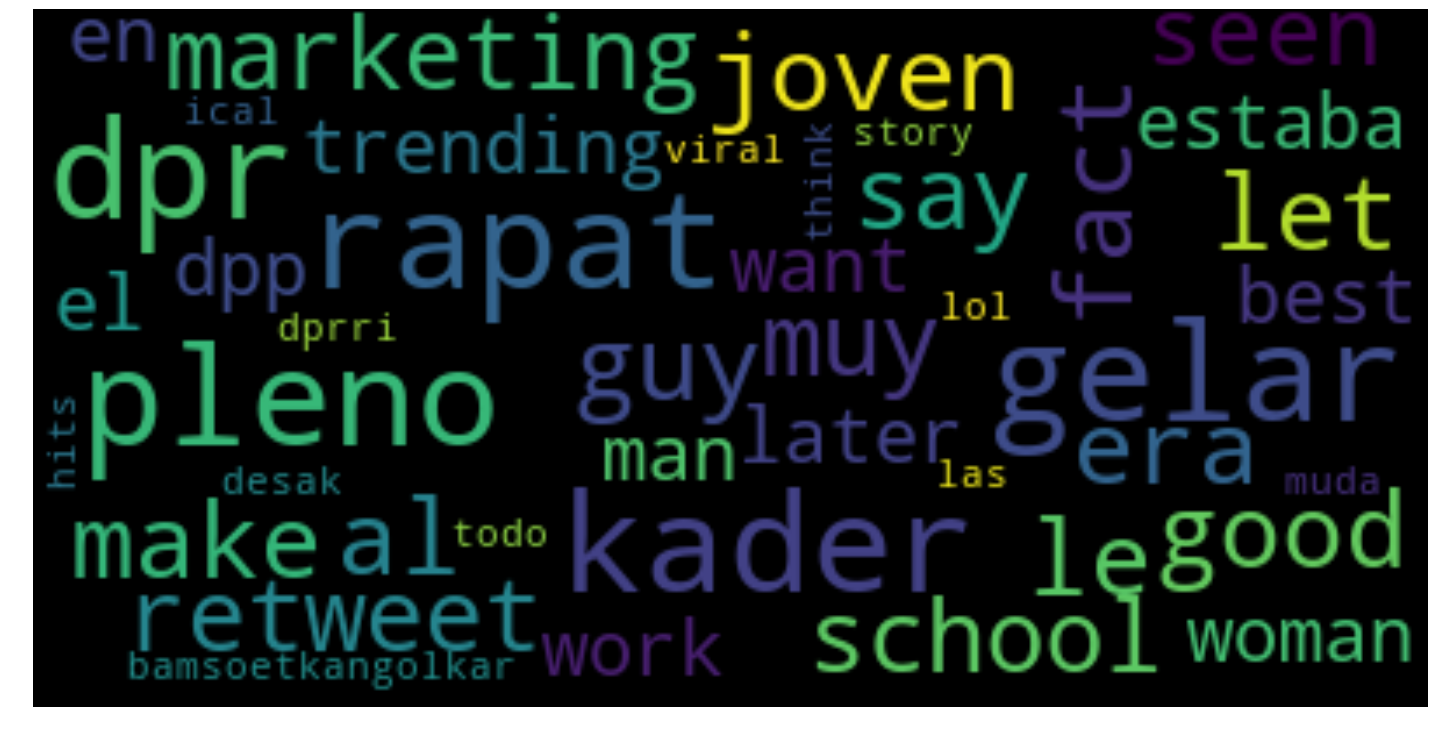

In [24]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(40))

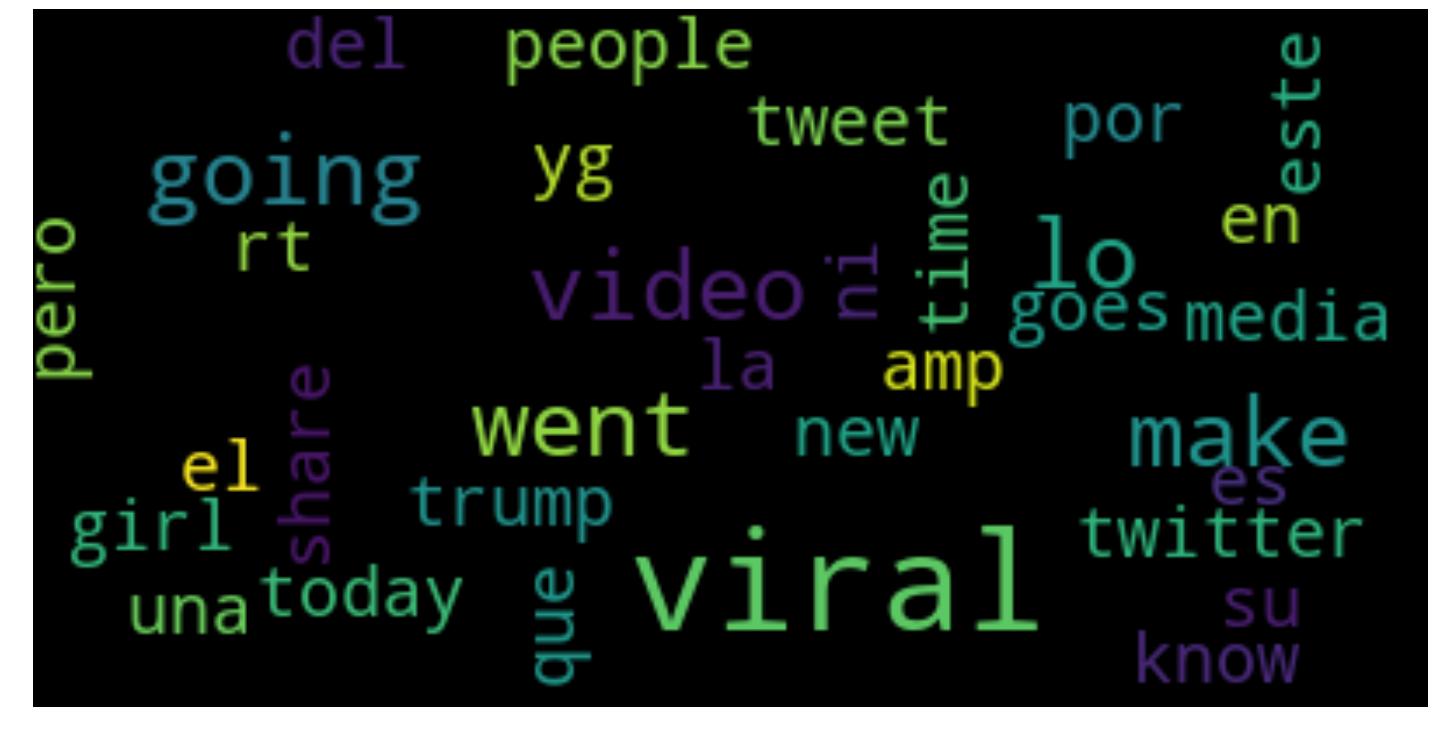

In [25]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))

In [26]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(vz)

svd_tfidf.shape

(245, 50)